In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [56]:
# Load Train dataset
df_train = pd.read_csv('data/df_baseline_train_dataset_features.csv', sep= ';') #No normalized

# Separate features and labels
X_train = df_train.drop(columns=['fileName', 'features', 'FileName', 'Speakers', 'Label', 'Label_name','VidNum', 'ClipNum'])
y_train = df_train['Label']-1

num_features = X_train.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler   # combined as a pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer( #pipeline
    [
        ("StandardScaler", numeric_transformer, num_features )    #first step   
    ]
)

In [57]:
X = preprocessor.fit_transform(X_train)  #preprocessor has saved values for mean and sd for standarization
X

array([[-1.07317748,  1.10762129,  1.48403985, ..., -1.35516323,
        -1.16798823, -1.32023011],
       [-0.07050331, -1.15988101,  1.24492884, ...,  0.35211656,
         0.5467658 ,  0.43859542],
       [-0.07050331, -1.15988101,  1.24492884, ...,  0.35211656,
         0.5467658 ,  0.43859542],
       ...,
       [-0.3220356 ,  0.94613742,  0.3748308 , ..., -1.42792679,
        -0.58899547, -1.26295805],
       [-0.90343165,  0.44822879, -1.16610693, ...,  0.0672712 ,
        -0.86618826, -1.68984117],
       [-0.90343165,  0.44822879, -1.16610693, ...,  0.0672712 ,
        -0.86618826, -1.68984117]])

In [58]:
X.shape

(678, 6373)

In [59]:
X_train = X

In [60]:
# # separate dataset into train and test
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) #split dataset
# X_train.shape, X_test.shape

# Load VAlidation dataset
df_val = pd.read_csv('data/df_baseline_val_dataset_features.csv', sep= ';') #No normalized

# Separate features and labels
X_val= df_val.drop(columns=['fileName', 'features', 'FileName', 'Speakers', 'Label', 'Label_name','VidNum', 'ClipNum'])
y_val = df_val['Label'] - 1


# Load Test dataset
df_test = pd.read_csv('data/df_baseline_test_dataset_features.csv', sep= ';') #No normalized
#df = pd.read_csv('df_baseline_Train_dataset_features_normalized.csv', sep= ';') # normnalized

# Separate features and labels
X_test= df_test.drop(columns=['fileName', 'features', 'FileName', 'Speakers', 'Label', 'Label_name','VidNum', 'ClipNum'])
y_test = df_test['Label'] -1



In [61]:
X_val = preprocessor.fit_transform(X_val)
X_test = preprocessor.fit_transform(X_test)

X_test

array([[ 0.10725325, -1.37716502, -1.04311885, ..., -1.15066237,
        -0.87888219, -1.27889231],
       [-0.13751728, -0.47391052,  1.4426432 , ..., -1.04995412,
        -0.56279723,  1.38048589],
       [-0.13751728, -0.47391052,  1.4426432 , ..., -1.04995412,
        -0.56279723,  1.38048589],
       ...,
       [-0.43563758,  1.37712513, -1.78355858, ...,  0.06139436,
         0.92710939,  0.1124646 ],
       [-0.28424325,  1.70153356,  0.23281734, ...,  0.33540689,
         0.67734915,  1.93228577],
       [-0.28424325,  1.70153356,  0.23281734, ...,  0.33540689,
         0.67734915,  1.93228577]])

In [62]:
X_test.shape, X_val.shape

((102, 6373), (201, 6373))

#### Create an Evaluate Function to give all metrics after model Training

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
r2_list_val =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_val_mae , model_val_rmse, model_val_r2 = evaluate_model(y_val, y_val_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Validation set')
    print("- Root Mean Squared Error: {:.4f}".format(model_val_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_val_mae))
    print("- R2 Score: {:.4f}".format(model_val_r2))
    r2_list_val.append(model_val_r2)

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Validation set
- Root Mean Squared Error: 0.8385
- Mean Absolute Error: 0.6507
- R2 Score: -0.0547
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8814
- Mean Absolute Error: 0.7414
- R2 Score: -0.1652


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.8165
- Mean Absolute Error: 0.6667
- R2 Score: 0.0000
----------------------------------
Model performance for Validation set
- Root Mean Squared Error: 0.8165
- Mean Absolute Error: 0.6667
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8165
- Mean Absolute Error: 0.6667
- R2 Score: 0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0003
- Mean Absolute Error: 0.0002
- R2 Score: 1.0000
--

### Results

#### For validation dataset

In [20]:
pd.DataFrame(list(zip(model_list, r2_list_val)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.165235
8,AdaBoost Regressor,0.114107
5,Random Forest Regressor,0.040152
1,Lasso,0.000000
3,K-Neighbors Regressor,-0.011343
2,Ridge,-0.051754
0,Linear Regression,-0.054650
6,XGBRegressor,-0.107824
4,Decision Tree,-0.932836


#### Best Model:  Linear Regression

Validation dataset

In [28]:
lin_model = DecisionTreeRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_val)
score = r2_score(y_val, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is -95.52


In [29]:
#### Plot y_pred and y_test

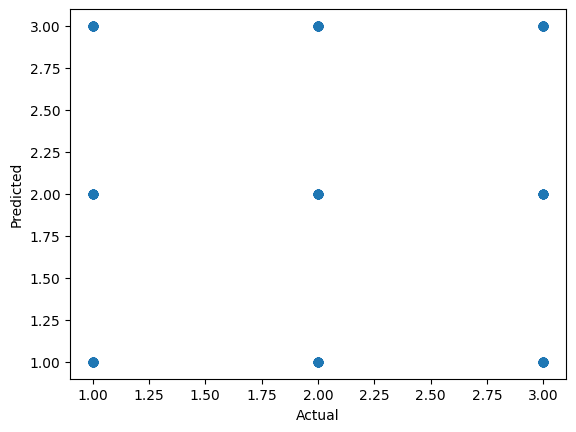

In [30]:
plt.scatter(y_val,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

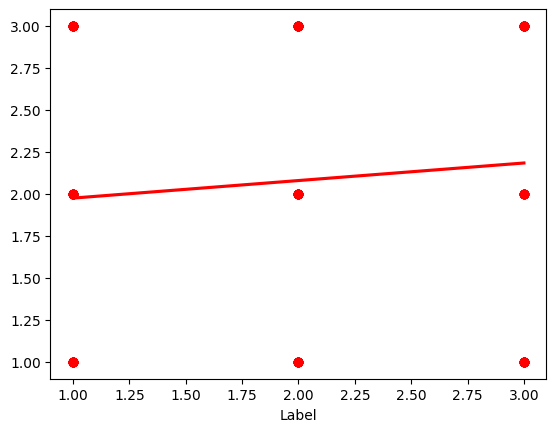

In [31]:
sns.regplot(x=y_val,y=y_pred,ci=None,color ='red');

UAR: 0.40
[[28 15 24]
 [19 19 29]
 [23 11 33]]


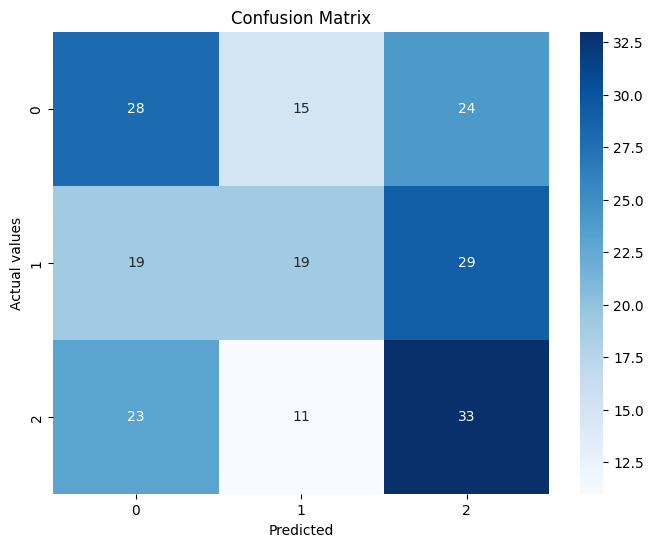

In [32]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



# Compute UAR and confusion matrix
uar = recall_score(y_val, y_pred, average='macro')
print(f'UAR: {uar :.2f}')

cm = confusion_matrix(y_val, y_pred,)
print(cm)

# Plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

Test dataset:

In [33]:
lin_model = DecisionTreeRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is -91.18


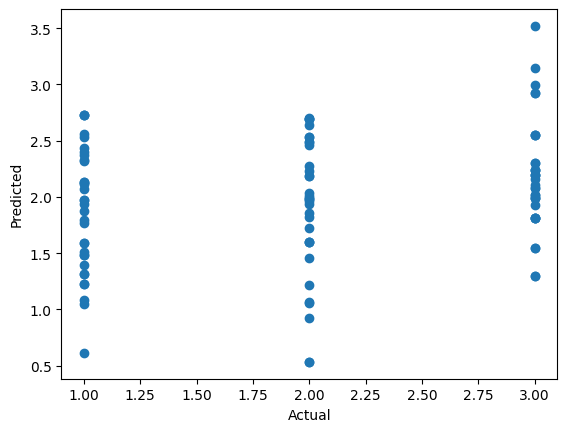

In [26]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

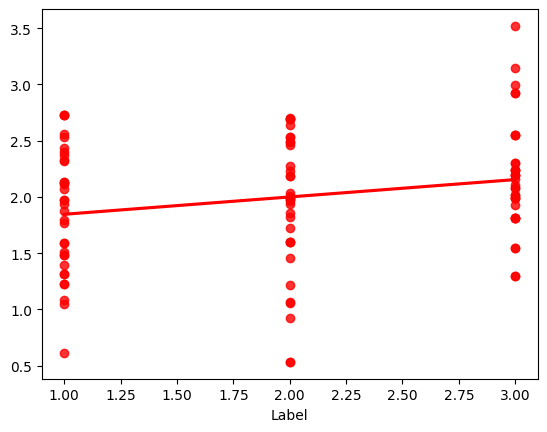

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

UAR: 0.34
[[ 8 16 10]
 [14 13  7]
 [11  9 14]]


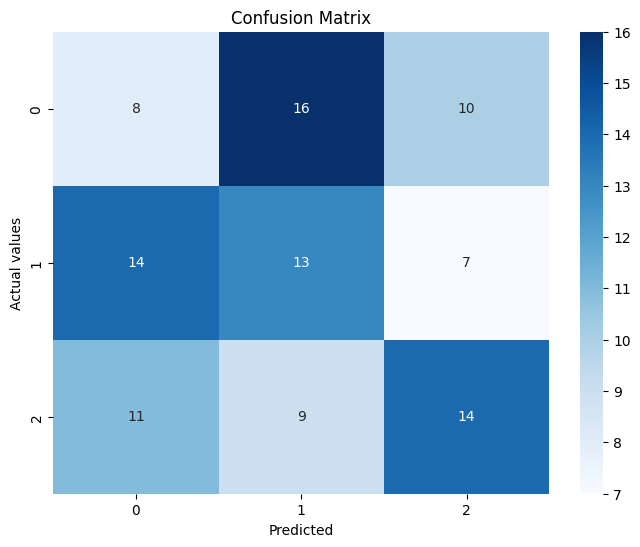

In [34]:
# Compute UAR and confusion matrix
uar = recall_score(y_test, y_pred, average='macro')
print(f'UAR: {uar :.2f}')

cm = confusion_matrix(y_test, y_pred,)
print(cm)

# Plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#### For test dataset

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.210994
8,AdaBoost Regressor,0.208673
5,Random Forest Regressor,0.188738
6,XGBRegressor,0.154751
3,K-Neighbors Regressor,0.121176
1,Lasso,0.000000
2,Ridge,-0.164520
0,Linear Regression,-0.165199
4,Decision Tree,-1.147059


Classification models:

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "SVM": SVC(),#probability=True),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Neural Network": MLPClassifier()
}




from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss


def evaluate_classification_model(true, predicted, predicted_prob):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    roc_auc = 1 # roc_auc_score(true, predicted_prob, multi_class='ovr')
    conf_matrix = confusion_matrix(true, predicted)
    logloss = 1 #log_loss(true, predicted_prob)
    uar = recall_score(true, predicted, average='macro')  # Unweighted Average  Unweighted Average Recall (UAR): Calculated as the macro-average of recall values for each class.
    
    #     "accuracy": accuracy,
    #     "precision": precision,
    #     "recall": recall,
    #     "f1_score": f1,
    #     "roc_auc": roc_auc,
    #     "confusion_matrix": conf_matrix,
    #     "log_loss": logloss,
    #     "uar_score": uar
    return accuracy, precision, recall, f1,roc_auc,conf_matrix,logloss, uar

model_list = []
acc_list =[]
precission_list =[]
cm_list =[]
recall_list=[]
f1_list=[]
roc_list=[]
ll_list=[]
uar_list=[]


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_val_pred = model.predict(X_val)
    #y_val_prob = model.predict_proba(X_val)
    y_val_prob = y_val_pred
    # Evaluate Train and Test dataset

    # metrics = evaluate_classification_model(y_val, y_val_pred, y_val_prob)
    # for metric, value in metrics.items():
    #     print(f"{metric}: {value}")

    acc, prec, rec, f1_sc, roc, cm, ll, uar_score= evaluate_classification_model(y_val, y_val_pred, y_val_prob)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    

    print('Model performance for Validation set')
    print("- Accuracy: {:.4f}".format(acc))
    print("- Precision: {:.4f}".format(prec))
    print("- Recall: {:.4f}".format(rec))
    print("- f1 Score: {:.4f}".format(f1_sc))
    print("- Roc_auc_score: {:.4f}".format(roc))
    print("- CM: {}".format(cm))
    print("- Logistic Loss: {:.4f}".format(ll))
    print("- UAR: {:.4f}".format(uar_score))

    acc_list.append(acc)
    precission_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1_sc)
    roc_list.append(roc)
    cm_list.append(cm)
    ll_list.append(ll)
    uar_list.append(uar_score)


    print('='*35)
    print('\n')

c:\Users\saray\Desktop\mlproject\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Validation set
- Accuracy: 0.5174
- Precision: 0.5198
- Recall: 0.5174
- f1 Score: 0.5181
- Roc_auc_score: 1.0000
- CM: [[34 20 13]
 [22 32 13]
 [17 12 38]]
- Logistic Loss: 1.0000
- UAR: 0.5174


K-Neighbors Classifier
Model performance for Validation set
- Accuracy: 0.4527
- Precision: 0.4465
- Recall: 0.4527
- f1 Score: 0.4325
- Roc_auc_score: 1.0000
- CM: [[27 19 21]
 [16 15 36]
 [ 6 12 49]]
- Logistic Loss: 1.0000
- UAR: 0.4527


Decision Tree Classifier
Model performance for Validation set
- Accuracy: 0.4428
- Precision: 0.4429
- Recall: 0.4428
- f1 Score: 0.4407
- Roc_auc_score: 1.0000
- CM: [[31 18 18]
 [16 24 27]
 [19 14 34]]
- Logistic Loss: 1.0000
- UAR: 0.4428


Random Forest Classifier
Model performance for Validation set
- Accuracy: 0.5373
- Precision: 0.5434
- Recall: 0.5373
- f1 Score: 0.5228
- Roc_auc_score: 1.0000
- CM: [[49  4 14]
 [31 21 15]
 [16 13 38]]
- Logistic Loss: 1.0000
- UAR: 0.5373


SVM
Model performance for Valid

In [45]:
acc

'accuracy'

In [40]:
accuracy = accuracy_score(y_test, y_pred)


In [43]:
print("- Accuracy: {:.4f}".format(accuracy))

- Accuracy: 0.3431


In [65]:
model_list

['Logistic Regression',
 'K-Neighbors Classifier',
 'Decision Tree Classifier',
 'Random Forest Classifier',
 'SVM',
 'Gradient Boosting Classifier',
 'XGBClassifier',
 'CatBoost Classifier',
 'AdaBoost Classifier',
 'Neural Network']

# Results

In [67]:
pd.DataFrame(list(zip(model_list, uar_list, acc_list, precission_list, f1_list, cm_list)), columns=['Model Name', 'uar_score', 'acc_score', 'prec_score', 'f1_score', 'cm_score']).sort_values(by=["uar_score"],ascending=False)

,Model Name,uar_score,acc_score,prec_score,f1_score,cm_score
4,SVM,0.552239,0.552239,0.554741,0.552231,"[[36, 13, 18], [18, 34, 15], [5, 21, 41]]"
7,CatBoost Classifier,0.542289,0.542289,0.544411,0.542555,"[[35, 12, 20], [14, 38, 15], [11, 20, 36]]"
3,Random Forest Classifier,0.537313,0.537313,0.543404,0.522797,"[[49, 4, 14], [31, 21, 15], [16, 13, 38]]"
5,Gradient Boosting Classifier,0.527363,0.527363,0.529920,0.524462,"[[28, 16, 23], [13, 39, 15], [10, 18, 39]]"
0,Logistic Regression,0.517413,0.517413,0.519834,0.518139,"[[34, 20, 13], [22, 32, 13], [17, 12, 38]]"
9,Neural Network,0.517413,0.517413,0.518675,0.514895,"[[41, 18, 8], [12, 29, 26], [26, 7, 34]]"
6,XGBClassifier,0.507463,0.507463,0.530062,0.507927,"[[28, 15, 24], [7, 38, 22], [8, 23, 36]]"
1,K-Neighbors Classifier,0.452736,0.452736,0.446457,0.432493,"[[27, 19, 21], [16, 15, 36], [6, 12, 49]]"
8,AdaBoost Classifier,0.447761,0.447761,0.472218,0.447112,"[[38, 10, 19], [35, 26, 6], [28, 13, 26]]"
2,Decision Tree Classifier,0.442786,0.442786,0.442883,0.440721,"[[31, 18, 18], [16, 24, 27], [19, 14, 34]]"


In [ ]:
# "Logistic Regression": LogisticRegression(),
# "K-Neighbors Classifier": KNeighborsClassifier(),
# "Decision Tree Classifier": DecisionTreeClassifier(),
# "Random Forest Classifier": RandomForestClassifier(),
# "SVM": SVC(),#probability=True),
# "Gradient Boosting Classifier": GradientBoostingClassifier(),
# "XGBClassifier": XGBClassifier(),
# "CatBoost Classifier": CatBoostClassifier(verbose=False),
# "AdaBoost Classifier": AdaBoostClassifier(),
# "Neural Network": MLPClassifier()

UAR: 0.59
[[ 7 18  9]
 [ 8 23  3]
 [ 2  2 30]]


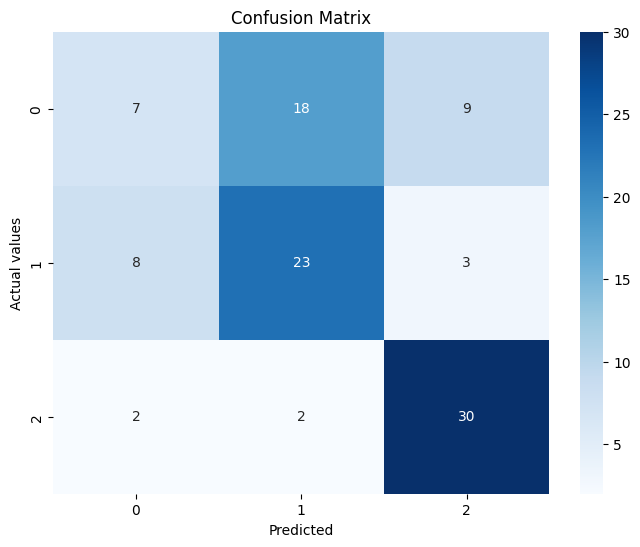

In [ ]:
model_selected = SVC()
model_selected = model_selected.fit(X_train, y_train)
y_pred = model_selected.predict(X_test)

# Compute UAR and confusion matrix
uar = recall_score(y_test, y_pred, average='macro')
print(f'UAR: {uar :.2f}')

cm = confusion_matrix(y_test, y_pred,)
print(cm)

# Plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

UAR: 0.55
[[36 13 18]
 [18 34 15]
 [ 5 21 41]]


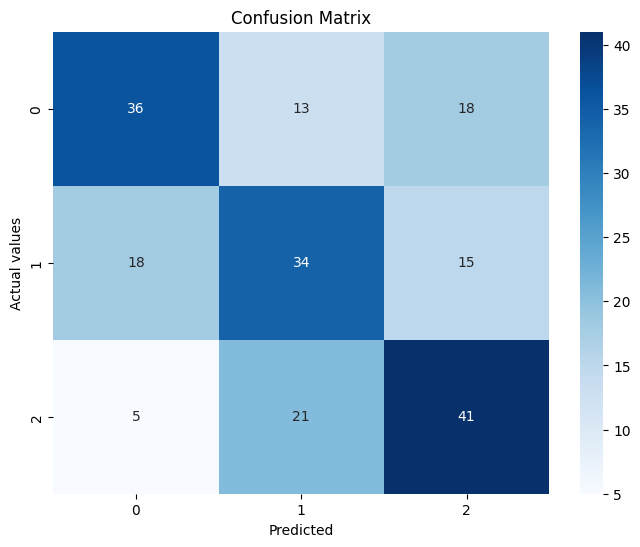

In [69]:
y_pred = model_selected.predict(X_val)

# Compute UAR and confusion matrix
uar = recall_score(y_val, y_pred, average='macro')
print(f'UAR: {uar :.2f}')

cm = confusion_matrix(y_val, y_pred,)
print(cm)

# Plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

UAR: 0.56
[[ 9 19  6]
 [10 21  3]
 [ 6  1 27]]


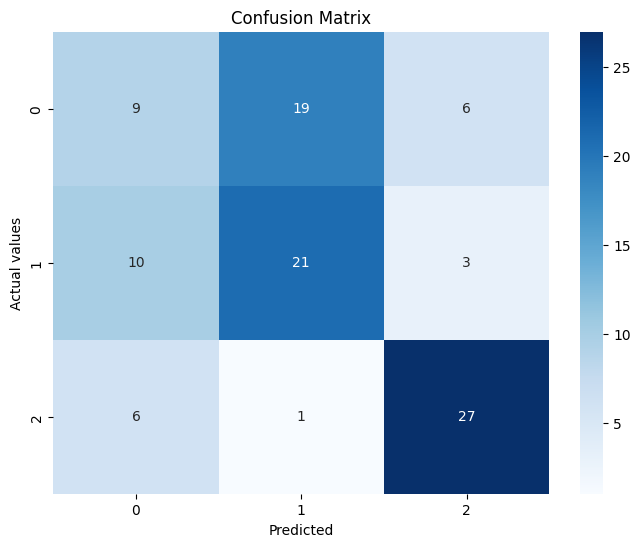

In [70]:
model_selected = CatBoostClassifier(verbose=False)
model_selected = model_selected.fit(X_train, y_train)
y_pred = model_selected.predict(X_test)

# Compute UAR and confusion matrix
uar = recall_score(y_test, y_pred, average='macro')
print(f'UAR: {uar :.2f}')

cm = confusion_matrix(y_test, y_pred,)
print(cm)

# Plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()